In [ ]:
import sys
import os
import cv2 as cv
import importlib
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import config as conf

import perception
print(dir(perception))


from perception import (
    detect_aruco_centers,
    detect_object_center,
    detect_aruco_corners,
    calculate_aruco_location, 
    apply_homography,
    apply_homography_inv, 
    detect_object_location
)

['SE3', 'SO3', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'apply_homography', 'apply_homography_inv', 'aruco', 'calculate_aruco_location', 'cv', 'detect_aruco_centers', 'detect_aruco_corners', 'detect_object_center', 'detect_object_location', 'find_circle', 'find_homography_in_height', 'find_hoop_homography', 'fk', 'follow_path', 'generate_flat_poses', 'ik', 'images_processing', 'np']


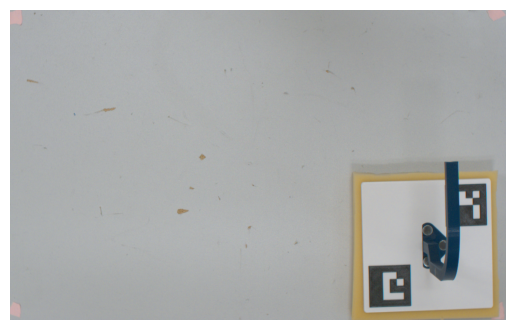

In [24]:
image = cv.imread("../images/image_RD.png")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

[[1]]


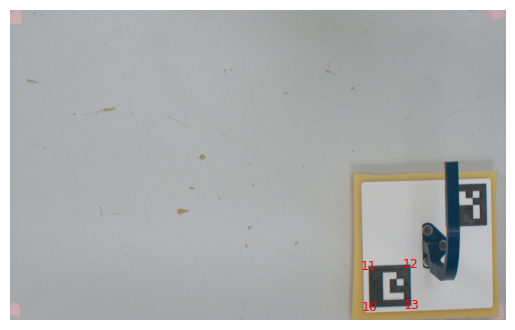

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

corners, ids = detect_aruco_corners(image=image)

img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")

H = conf.config["homo004"]

print(ids)
if ids is not None:
    for marker_corners, marker_id in zip(corners, ids.flatten()):
        pts = marker_corners[0] 
        for idx, (x, y) in enumerate(pts):
            label = f"{marker_id}{idx}"  
            plt.text(x, y, label,
                     color='red', fontsize=9,
                     ha='center', va='center')

plt.show()







In [26]:
print(calculate_aruco_location(corners=corners[0][0]))

(translation=[1.47025e+03 1.06825e+03 4.00000e-02], log_rotation=[ 0.        0.       -0.046695])


In [ ]:

H = conf.config["homo004"]
pts = detect_aruco_corners(image=image)[0][0][0]
print(pts)
plane_pts = np.array([apply_homography(H, pt) for pt in pts])

print(plane_pts)

print(calculate_aruco_location(corners = plane_pts))


[[1393. 1152.]
 [1387.  992.]
 [1549.  985.]
 [1552. 1144.]]
[[0.57586128 0.07653845]
 [0.53293175 0.07696272]
 [0.53154113 0.11590148]
 [0.57428238 0.11505703]]
(translation=[0.55365414 0.09611492 0.04      ], log_rotation=[0.         0.         1.60911514])


(translation=[0.52214378 0.13493628 0.04      ], log_rotation=[0.         0.         1.60911514])


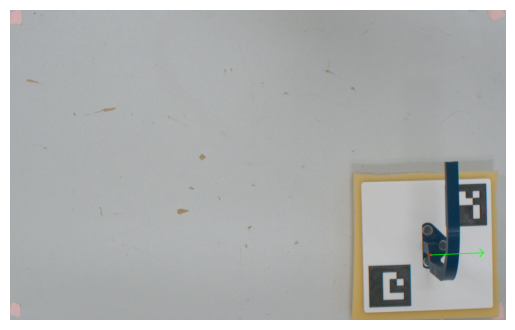

In [ ]:
loc = detect_object_location(image=image, H=H) 
print(loc)

center_world = loc.translation[:2]


center_uv = apply_homography_inv(H, center_world)
u, v = int(center_uv[0]), int(center_uv[1])


axis_local = loc.rotation.rot[:, 0]  

arrow_length_world = 0.05
arrow_endpoint_world = center_world + axis_local[:2] * arrow_length_world

arrow_endpoint_uv = apply_homography_inv(H, arrow_endpoint_world)
u2, v2 = int(arrow_endpoint_uv[0]), int(arrow_endpoint_uv[1])

img_draw = image.copy()
cv.circle(img_draw, (u, v), 6, (0, 0, 255), -1)     
cv.arrowedLine(img_draw, (u, v), (u2, v2), (0, 255, 0), 2) 

plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

